In [1]:
# Import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# ШАГИ
# 1. Определяем цели, метрики и размер выборки
# 2. EDA (exploratory data analysis)
# 3. Находим отклонения при отсутствии изменений с помощью AA-теста
# 4. Собираем данные (генерируем)
# 5. Проводим анализ данных

In [3]:
# 1. Определяем размер выборки
# Формула расчета размеры выборки зависит от типа распределения
# Пример. AB тест конверсии. Бинарный результат (конверсия есть или ее нет), биномиальное распределение Бернули,
# используем формулу N = p * (1 - p) * (a / mde) ** 2 (mde - minimum detectable effect) вместо mde может
# использоваться E (acceptable margin of error)
# * Формула упрощенная и не учитывает мощности
# p — текущий уровень конверсии
pop_prop = 0.0069
# alpha — пороговый уровень статистической значимости
a = 1.96
# mde — изменение в конверсии (absolute), которое мы хотим обнаружить
mde = 0.0005
N = pop_prop * (1 - pop_prop) * (a / mde) ** 2
print('count of observation:', round(N))

count of observation: 105297


In [4]:
# 2. EDA
sample = [0.0055, 0.0077, 0.0092, 0.0094, 0.0038, 0.0046, 0.0061, 0.0077, 0.0056, 0.0071, 0.0062, 0.0056, 0.0053,
          0.0043, 0.008, 0.0059, 0.0074, 0.0093, 0.0072, 0.0074, 0.0077, 0.0068, 0.0064, 0.0078, 0.0099, 0.0099,
          0.0089, 0.0041, 0.0062, 0.0069]
st_dev = np.std(sample)
print('st_dev:', st_dev)

st_dev: 0.0016745447142432477


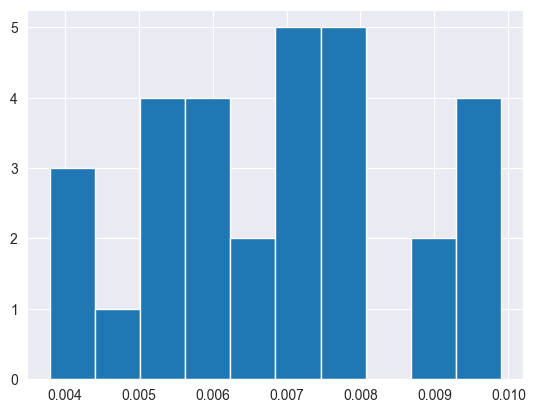

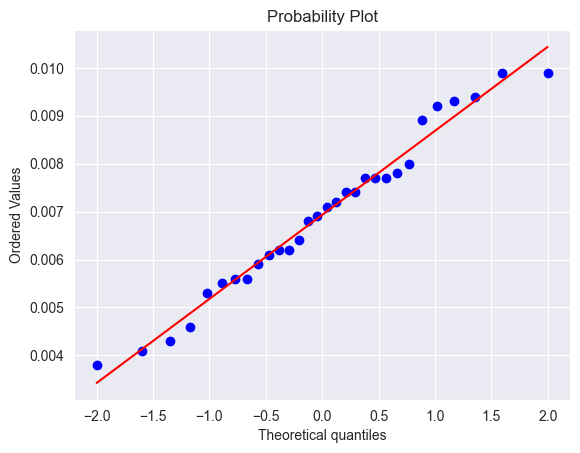

In [5]:
# Проверяем распределение на нормальность
plt.hist(sample)
plt.show()
stats.probplot(sample, dist="norm", plot=plt)
plt.show()

AA test probability: 0.059


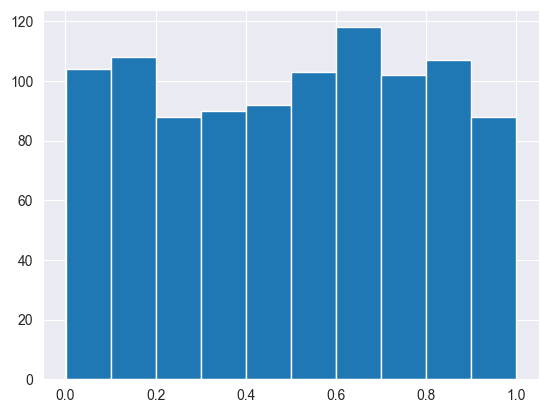

In [6]:
# 3. АА тест. Особенность множественного сравнения гипотез с использованием t-теста. При множественном сравнении есть
# вероятность получить подтверждение альтернативной гипотезы, хотя она неверна. Вероятность будет примерно равна
# заданному уровню p-value. Проверяем p-value на нормальном распределении.
p_value = []
cnt = 0
iteration = 1000
for _ in range(iteration):
    normal_dist_1 = np.random.normal(pop_prop, st_dev, 10000).tolist()
    normal_dist_2 = np.random.normal(pop_prop, st_dev, 10000).tolist()
    result = ttest_ind(normal_dist_1, normal_dist_2)
    p_value.append(result.pvalue)
    if result.pvalue <= 0.05:
        cnt += 1
print('AA test probability:', cnt / iteration)
plt.hist(p_value)
plt.show()

In [7]:
# Вывод: даже при нормальном распределении будут встречаться отклонения, которые подтвердят неверную
# альтернативную гипотезу

In [8]:
# 4. Собираем данные (на самом деле генерируем их)
p_value = []
cnt = 0
control_sample_means_distribution = []
treatment_sample_means_distribution = []
conversion_uplift = 0.0003
iteration = 1000
for _ in range(iteration):
    control_sample = np.random.normal(pop_prop, st_dev, 1000).tolist()
    treatment_sample = np.random.normal(pop_prop + conversion_uplift, st_dev, 1000).tolist()
    control_sample_means_distribution += [np.mean(control_sample)]
    treatment_sample_means_distribution += [np.mean(treatment_sample)]
    result = ttest_ind(control_sample, treatment_sample)
    p_value.append(result.pvalue)
    if result.pvalue <= 0.05:
        cnt += 1

In [10]:
p_value

[1.9290488464603514e-06,
 0.0002140799700471286,
 0.012790499290376126,
 2.874080465776445e-06,
 7.490077136157312e-07,
 0.012341342962671083,
 0.0020534229829997884,
 1.532570874315708e-05,
 2.6934271206018123e-05,
 1.2151425819793553e-07,
 0.00022353676765311613,
 0.03245482353496434,
 4.35081034410355e-09,
 0.0036066737762482726,
 1.9712337288783102e-05,
 0.0002723656809858138,
 6.837714561908956e-07,
 5.469565802586267e-05,
 0.001572440266343022,
 0.0006005285467108825,
 6.332537233749999e-05,
 6.851611121640537e-09,
 5.8039462787779416e-05,
 0.00010604185622450424,
 2.010841851611343e-05,
 7.461526661258648e-06,
 2.2725917963856567e-05,
 0.0051234123191656175,
 0.0001495910744719538,
 2.8880050242472646e-05,
 4.2176245193504855e-07,
 3.636004947163353e-08,
 5.299434563567502e-07,
 4.812447745248265e-05,
 0.00015919908263314393,
 0.00036242528805488045,
 0.014337183352194865,
 3.135712781771248e-05,
 8.320194378402637e-06,
 6.969225986586365e-05,
 0.001932102311204084,
 5.624616722

AB test probability: 0.974


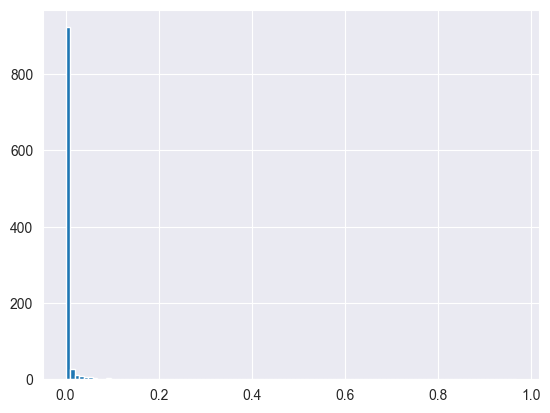

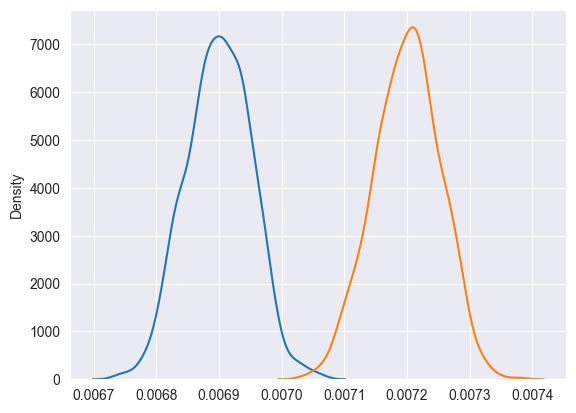

In [14]:
# 5. Проводим анализ данных
print('AB test probability:', cnt / iteration)
plt.hist(p_value, bins=100)
plt.show()
sns.kdeplot(control_sample_means_distribution)
sns.kdeplot(treatment_sample_means_distribution)
plt.show()